#  Classification avec des images réelles: dogs vs cats


Le dataset complet provient d'une compétition Kaggle: https://www.kaggle.com/c/dogs-vs-cats

Le dataset en question contient 2 folders: dogs - cats

Soit un total de 2000 images.

L'objectif est de capitaliser sur les notions du cours pour développer un réseau CNN qui arrive à prédire avec la meilleure performance possible les images de chiens et de chats.

Ce notebook va permettre de structurer l'approche et la construction du modèle.

## 1- Importer des librairies pertinentes:

In [501]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import os
import random

from tensorflow.keras.applications import VGG16


from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


import numpy as np
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam


from matplotlib.image import imread

import random
import seaborn as sns

from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau

#import appropriate libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau



## 2- Localiser le path où se trouvent toutes les images

In [502]:
# Define a variable as the directory path
my_data_dir = './data_cats_and_dogs'

### 2.1 - Vérifier que la commande ci-dessous retourne ['train', 'validation']

In [503]:
os.listdir(my_data_dir)

['.DS_Store', 'train', 'validation']

### 2.2 - Définir les variables train_path et val_path:

In [504]:
# train and test paths (\ for windows, / for mac)
train_path = os.path.join(my_data_dir, 'train')
test_path = os.path.join(my_data_dir, 'validation')

print(f'validation path : {test_path}')
print(f'training path : {train_path}')

validation path : ./data_cats_and_dogs/validation
training path : ./data_cats_and_dogs/train


### 2.3 - Print le nombre d'images pour chaque class (cats & dogs) dans le dossier train et validation:

In [505]:
# Vérifier le nombre d'images de chaque classe pour le train_path et val_path
train_dogs_path = os.path.join(train_path, 'dogs')
train_cats_path = os.path.join(train_path, 'cats')
test_dogs_path = os.path.join(test_path, 'dogs')
test_cats_path = os.path.join(test_path, 'cats')

training_dogs_ctn = len(os.listdir(train_dogs_path))
training_cats_ctn = len(os.listdir(train_cats_path))
testing_dogs_ctn = len(os.listdir(test_dogs_path))
testing_cats_ctn = len(os.listdir(test_cats_path))

print(f'le nombre de la class "dogs" in training set est : {training_dogs_ctn}')
print(f'le nombre de la class "cats" in training set est : {training_cats_ctn}')
print(f'le nombre de la class "dogs" in validation set est : {testing_dogs_ctn}')
print(f'le nombre de la class "cats" in validation set est : {testing_cats_ctn}')

# Vérifier que vous avez bien 2000 images au total !
print(f'le totale des elements dans le training set est : {training_dogs_ctn + training_cats_ctn}')
print(f'le totale des elements dans le testing set est {testing_cats_ctn + testing_dogs_ctn}')


le nombre de la class "dogs" in training set est : 1000
le nombre de la class "cats" in training set est : 1000
le nombre de la class "dogs" in validation set est : 500
le nombre de la class "cats" in validation set est : 500
le totale des elements dans le training set est : 2000
le totale des elements dans le testing set est 1000


## 3) Analyse d'exemples d'images dogs and cats

### 3.1 - Choisir au hasard une image de dog dans le train_path

In [506]:
random_dog_img = random.randint(1, 1000)
dog_path = os.listdir(train_dogs_path)[random_dog_img]
dog_path

'dog.773.jpg'

### 3.2 - Transformer cette image en numpy array

In [507]:
dog_array = imread(os.path.join(train_dogs_path, dog_path))
dog_array

array([[[ 61,  43,  23],
        [ 57,  39,  19],
        [ 59,  41,  21],
        ...,
        [120,  97,  91],
        [116,  95,  68],
        [114,  92,  55]],

       [[ 59,  40,  23],
        [ 56,  38,  18],
        [ 58,  40,  20],
        ...,
        [127, 104,  98],
        [126, 105,  78],
        [126, 104,  67]],

       [[ 63,  44,  27],
        [ 59,  40,  23],
        [ 60,  42,  22],
        ...,
        [113,  90,  84],
        [122,  98,  72],
        [126, 104,  67]],

       ...,

       [[ 34,  35,  37],
        [ 33,  34,  36],
        [ 28,  32,  33],
        ...,
        [130, 140, 149],
        [128, 138, 148],
        [126, 136, 146]],

       [[ 35,  36,  38],
        [ 33,  34,  36],
        [ 30,  31,  33],
        ...,
        [127, 137, 146],
        [127, 137, 147],
        [128, 138, 148]],

       [[ 32,  33,  35],
        [ 31,  32,  34],
        [ 30,  31,  33],
        ...,
        [126, 136, 145],
        [128, 138, 148],
        [130, 140, 150]]

### 3.3 - Vérifier les dimensions de cette image

In [508]:
dog_array.shape

(399, 397, 3)

### 3.4 -Plot cette image via 'imshow'

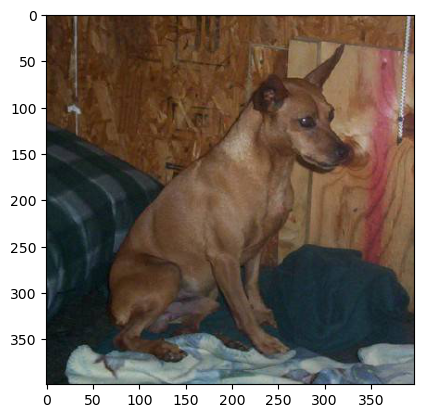

In [509]:
plt.imshow(dog_array)

### 3.5 - Refaire le même travail avec l'image d'un cat depuis le dossier train 

In [510]:
random_cat_img = random.randint(1, 1000)
cat_path = os.listdir(train_cats_path)[random_cat_img]
cat_path

'cat.285.jpg'

In [511]:
cat_array = imread(os.path.join(train_cats_path, cat_path))
cat_array

array([[[183, 176, 166],
        [183, 176, 166],
        [183, 176, 166],
        ...,
        [ 89,  68,  51],
        [ 90,  69,  52],
        [ 91,  70,  53]],

       [[183, 176, 166],
        [182, 175, 165],
        [182, 175, 165],
        ...,
        [ 87,  66,  49],
        [ 88,  67,  50],
        [ 89,  68,  51]],

       [[183, 176, 166],
        [182, 175, 165],
        [180, 173, 163],
        ...,
        [ 88,  67,  50],
        [ 89,  68,  51],
        [ 90,  69,  52]],

       ...,

       [[192, 182, 172],
        [181, 171, 159],
        [173, 163, 151],
        ...,
        [169, 162, 154],
        [168, 161, 153],
        [167, 160, 152]],

       [[188, 178, 168],
        [179, 169, 157],
        [173, 163, 151],
        ...,
        [172, 165, 157],
        [171, 164, 156],
        [170, 163, 155]],

       [[182, 172, 162],
        [178, 168, 156],
        [173, 163, 151],
        ...,
        [175, 168, 160],
        [174, 167, 159],
        [173, 166, 158]]

In [512]:
cat_array.shape

(499, 436, 3)

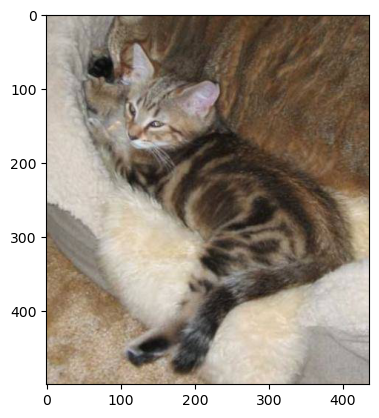

In [513]:
plt.imshow(cat_array)

## 4) Créer un ImageDataGenerator qui effectue un retraitement "pertinent" de ces images:

In [514]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [515]:
image_generator = ImageDataGenerator(rescale=1./255)

## 5) Construire un modèle CNN from scratch pour la classification binaire de ces images:


**- Utiliser à minima les types layers suivants: Conv2D, MaxPooling2D, Dense.**

**- Utiliser également la technique du Dropout.**

**- Prendre un input_shape arbitraire fixe et approprié**

**- Print le model summary**

**- Ne pas hésiter à ajouter des techniques ou des méthodes sur les données ou le modèle pour améliorer la performance !**

**L'objectif est de maximiser l'accuracy sur les données de test**

In [516]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_cats_path):
    img = imread(os.path.join(test_cats_path, image_filename))
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

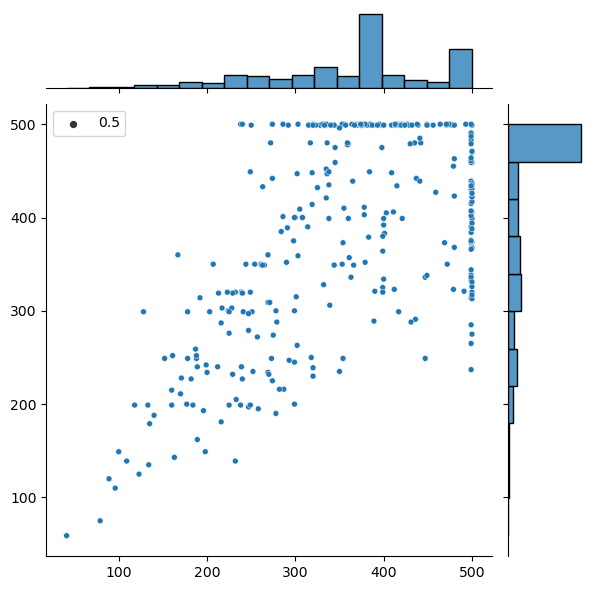

In [517]:
sns.jointplot(x = dim1,y = dim2, size=0.5)

In [518]:
print(np.mean(dim1))
print(np.mean(dim2))

357.926
411.862


In [519]:
import math
input_shape = (math.ceil(np.mean(dim1)),math.ceil(np.mean(dim2)),3)
input_shape

(358, 412, 3)

In [520]:
input_shape[:2]

(358, 412)

In [521]:
# Create the CNN model

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Augmentation du dropout

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 356, 410, 32)      896       
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 178, 205, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 176, 203, 64)      18496     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 88, 101, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 86, 99, 128)       73856     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 43, 49, 128)     

### 5.2 Créer une instance de EarlyStopping

In [522]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001)

### 5.3 Créer un generator pour le train et validation set: 

In [523]:
batch_size = 64

In [524]:
train_image_generator = image_generator.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [525]:
val_image_generator = image_generator.flow_from_directory(
    test_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary',
    shuffle=False
)   

Found 1000 images belonging to 2 classes.


In [526]:
# verify the classes dictionary (1 is dog or cat ?)
train_image_generator.class_indices

{'cats': 0, 'dogs': 1}

In [527]:
val_image_generator.class_indices

{'cats': 0, 'dogs': 1}

### 5.3 Entrainer le modèle à partir du train_image_generator et utiliser le EarlyStopping

In [528]:
# suivre à la fois la loss, accuracy, val_loss et val_accuracy
import warnings

warnings.filterwarnings('ignore')

history = model.fit_generator(
    train_image_generator,
    epochs=20,  # Specify the number of epochs
    validation_data=val_image_generator,
    callbacks=[early_stop, reduce_lr]  # Pass the EarlyStopping callback to the fit method
)

Epoch 1/20
32/32 [==============================] - 22s 663ms/step - loss: 4.2158 - accuracy: 0.5020 - val_loss: 2.0361 - val_accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/20
32/32 [==============================] - 21s 648ms/step - loss: 1.6509 - accuracy: 0.5000 - val_loss: 1.3282 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/20
32/32 [==============================] - 21s 663ms/step - loss: 1.2443 - accuracy: 0.4985 - val_loss: 1.0907 - val_accuracy: 0.5710 - lr: 1.0000e-04
Epoch 4/20
32/32 [==============================] - 21s 652ms/step - loss: 1.0469 - accuracy: 0.5385 - val_loss: 0.9527 - val_accuracy: 0.6260 - lr: 1.0000e-04
Epoch 5/20
32/32 [==============================] - 21s 655ms/step - loss: 0.9239 - accuracy: 0.5770 - val_loss: 0.8568 - val_accuracy: 0.6620 - lr: 1.0000e-04
Epoch 6/20
32/32 [==============================] - 21s 655ms/step - loss: 0.8418 - accuracy: 0.6150 - val_loss: 0.8065 - val_accuracy: 0.6390 - lr: 1.0000e-04
Epoch 7/20
32/32 [======================

## 8) Evaluation du modèle

### 8.1 Sauvegarder les losses dans un dataframe

In [529]:
losses=pd.DataFrame(history.history)
losses

,loss,accuracy,val_loss,val_accuracy,lr
0,4.215817,0.5020,2.036095,0.505,0.00010
1,1.650904,0.5000,1.328195,0.500,0.00010
2,1.244337,0.4985,1.090715,0.571,0.00010
3,1.046930,0.5385,0.952720,0.626,0.00010
4,0.923943,0.5770,0.856795,0.662,0.00010
5,0.841844,0.6150,0.806485,0.639,0.00010
6,0.786379,0.6330,0.755111,0.657,0.00010
7,0.734872,0.6650,0.733189,0.645,0.00010
8,0.702806,0.6780,0.690960,0.689,0.00010
9,0.671556,0.7070,0.675632,0.682,0.00010


### 8.2 Plot le training et validation loss 

<Axes: >

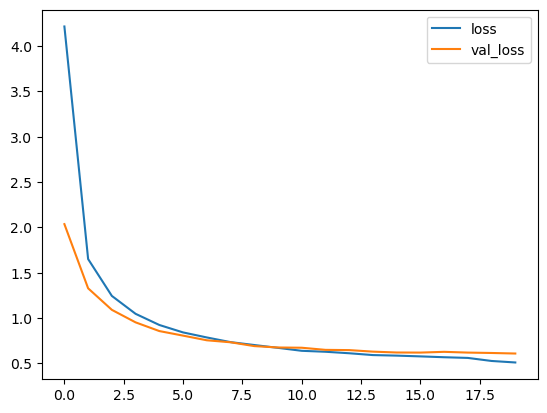

In [530]:
losses[['loss','val_loss']].plot()

### 8.3 Calculer les probabilités pour le validation image generator 

In [531]:
y_pred_proba = model.predict_generator(val_image_generator)

### 8.4 Transformer ces probabilités en classes en prenant un threshold de 0.5

In [532]:
y_pred_class = y_pred_proba>0.5

### 8.5 Récupérer le vecteur des true labels à partir du validation image generator

In [533]:
y_test = val_image_generator.classes
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 8.6 Afficher le classification report et la matrice de confusion

In [534]:
from sklearn.metrics import classification_report, confusion_matrix
# print classification_report
print(classification_report(val_image_generator.classes, y_pred_class))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       500
           1       0.75      0.65      0.70       500

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



In [535]:
print(confusion_matrix(val_image_generator.classes, y_pred_class))

[[393 107]
 [174 326]]


### 8.7 KPI final: quel est l'accuracy du model sur les données de test ? Etes-vous satisfaits de la performance de votre modèle ?

In [536]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(val_image_generator.classes, y_pred_class)
print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.719


# 9) Prédictions sur des cas particuliers

### 9.1 Afficher quelques images des données de test où le modèle s'est trompé.

In [545]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [546]:
y_pred_class_indice=y_pred_class.astype(int)
y_pred_class_indice = y_pred_class_indice.flatten()
y_pred_class_indice

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [547]:
misclassified_indices = np.where(y_pred_class.flatten() != y_test)[0]
misclassified_indices 

array([  6,  13,  23,  25,  27,  31,  38,  45,  56,  61,  63,  71,  74,
        75,  78,  82,  84,  85,  95, 102, 105, 109, 116, 118, 123, 146,
       155, 156, 166, 168, 176, 177, 178, 179, 182, 183, 186, 195, 202,
       211, 213, 216, 223, 228, 235, 243, 245, 248, 251, 255, 260, 265,
       266, 270, 273, 278, 282, 288, 290, 297, 298, 301, 305, 312, 317,
       318, 333, 334, 337, 340, 346, 350, 351, 362, 367, 373, 374, 377,
       379, 387, 388, 389, 390, 391, 397, 403, 407, 408, 411, 414, 416,
       417, 418, 419, 422, 432, 439, 440, 457, 464, 467, 474, 476, 485,
       488, 491, 492, 505, 506, 507, 508, 511, 518, 524, 525, 529, 536,
       537, 538, 541, 543, 545, 546, 548, 550, 551, 552, 554, 558, 559,
       560, 565, 569, 575, 578, 582, 584, 585, 589, 594, 595, 597, 603,
       605, 606, 607, 609, 615, 616, 618, 621, 623, 633, 637, 640, 658,
       661, 665, 666, 668, 673, 677, 679, 680, 681, 682, 683, 689, 692,
       695, 696, 705, 710, 714, 715, 716, 717, 718, 721, 724, 72

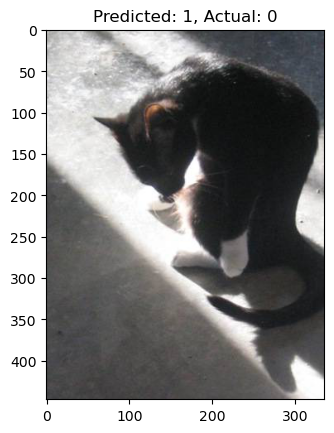

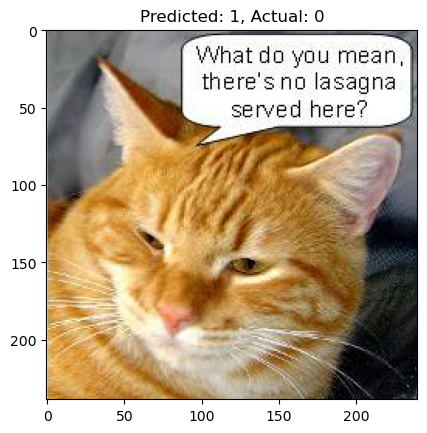

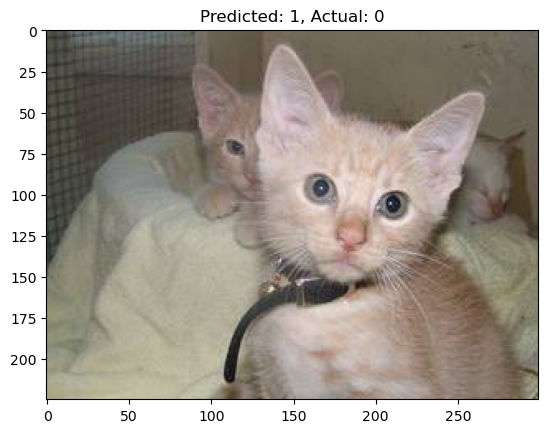

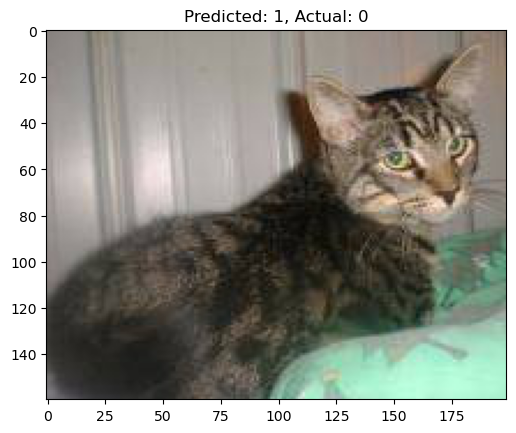

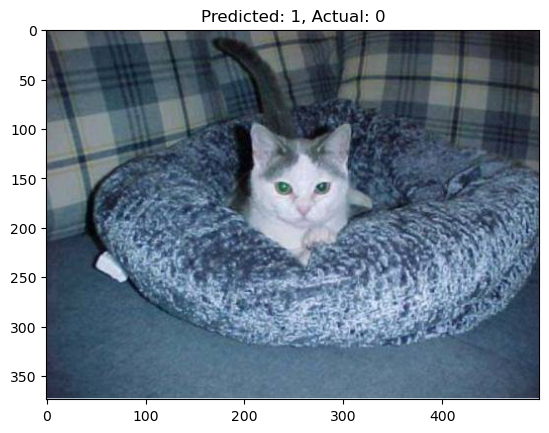

In [548]:
num_images_to_display = 5
for i in range(num_images_to_display):
    index = misclassified_indices[i]
    img_path = val_image_generator.filepaths[index]
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(f"Predicted: {y_pred_class_indice[index]}, Actual: {y_test[index]}")
    plt.show()

### 9.2 Ces images ont-elles des patterns en commun ?

# 10) Data augmentation (optionnel)

Utiliser des techniques de Data augmentation. L'objectif est d'enrichir le training set à partir des images initiales afin d'améliorer la performance du modèle.

Votre accuracy s'améliore t-elle post votre data augmentation ?

Vous êtes libre de structurer cette partie comme vous le jugez pertinent.

In [549]:
# Create the CNN model

model_aug = Sequential()

model_aug.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_aug.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_aug.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_aug.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_aug.add(Flatten())

model_aug.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model_aug.add(Dropout(0.5))  # Augmentation du dropout

model_aug.add(Dense(1, activation='sigmoid'))

model_aug.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [550]:
model_aug.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 356, 410, 32)      896       
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 178, 205, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 176, 203, 64)      18496     
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 88, 101, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_55 (Conv2D)          (None, 86, 99, 128)       73856     
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 43, 49, 128)     

In [551]:
image_generator_aug = ImageDataGenerator(
    rescale=1.0/255.0, 
    rotation_range=40, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest' 
)

In [552]:
train_image_generator_aug = image_generator_aug.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary'
)


val_image_generator_aug = image_generator_aug.flow_from_directory(
    test_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary',
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [553]:
results_aug= model_aug.fit_generator(train_image_generator_aug, epochs=30, validation_data=val_image_generator_aug,
                                callbacks=[early_stop, reduce_lr])

Epoch 1/30
32/32 [==============================] - 52s 2s/step - loss: 7.4876 - accuracy: 0.4960 - val_loss: 4.5106 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/30
32/32 [==============================] - 50s 2s/step - loss: 3.0313 - accuracy: 0.5550 - val_loss: 1.8768 - val_accuracy: 0.5800 - lr: 1.0000e-04
Epoch 3/30
32/32 [==============================] - 50s 2s/step - loss: 1.3875 - accuracy: 0.5610 - val_loss: 1.0135 - val_accuracy: 0.5830 - lr: 1.0000e-04
Epoch 4/30
32/32 [==============================] - 50s 2s/step - loss: 0.8576 - accuracy: 0.5890 - val_loss: 0.8018 - val_accuracy: 0.5290 - lr: 1.0000e-04
Epoch 5/30
32/32 [==============================] - 50s 2s/step - loss: 0.7457 - accuracy: 0.5575 - val_loss: 0.6918 - val_accuracy: 0.6150 - lr: 1.0000e-04
Epoch 6/30
32/32 [==============================] - 50s 2s/step - loss: 0.6879 - accuracy: 0.5975 - val_loss: 0.6605 - val_accuracy: 0.6190 - lr: 1.0000e-04
Epoch 7/30
32/32 [==============================] - 50s 2s

In [606]:
losses_aug = pd.DataFrame(results_aug.history)
losses_aug

,loss,accuracy,val_loss,val_accuracy,lr
0,7.487607,0.4960,4.510620,0.500,0.000100
1,3.031273,0.5550,1.876833,0.580,0.000100
2,1.387495,0.5610,1.013536,0.583,0.000100
3,0.857554,0.5890,0.801847,0.529,0.000100
4,0.745656,0.5575,0.691816,0.615,0.000100
5,0.687876,0.5975,0.660493,0.619,0.000100
6,0.673201,0.5765,0.653480,0.636,0.000100
7,0.659478,0.6225,0.643390,0.628,0.000100
8,0.651865,0.6355,0.640482,0.653,0.000100
9,0.641152,0.6470,0.638044,0.663,0.000100


<Axes: >

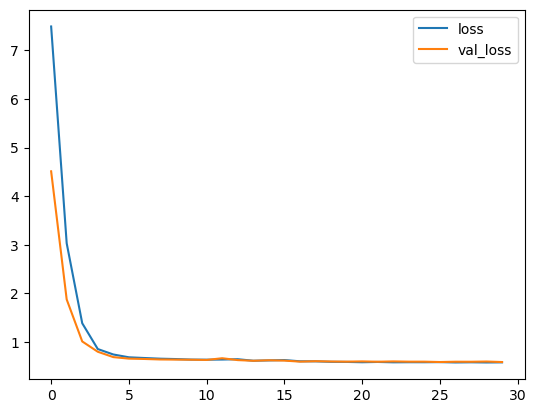

In [605]:
losses_aug[['loss', 'val_loss']].plot()

In [555]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_proba_aug = model_aug.predict_generator(val_image_generator)

In [556]:
y_pred_class_aug = y_pred_proba_aug>0.5
y_pred_class_aug

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [

In [557]:
print(classification_report(val_image_generator.classes, y_pred_class_aug))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       500
           1       0.75      0.67      0.71       500

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



In [558]:
print(confusion_matrix(val_image_generator.classes, y_pred_class_aug))

[[389 111]
 [167 333]]


In [559]:
accuracy = accuracy_score(val_image_generator.classes, y_pred_class)
print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.719


# 11) Transfer learning

Utiliser la technique de transfer learning à partir d'un modèle open source qui vous semble pertinent. Justifier le choix du modèle ? 

Au final, votre accuracy s'est elle améliorée significativement ?

Vous êtes libre de structurer cette partie comme vous le jugez pertinent.

In [591]:
image_generator = ImageDataGenerator(rescale=1/255)

train_generator_VGG16 = image_generator.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary')

val_generator_VGG16 = image_generator.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary', 
    shuffle= False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [593]:
from keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [596]:
from tensorflow.keras import layers, models

model_vgg16 = Sequential()
model_vgg16.add(base_model)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(256, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(1, activation='sigmoid'))
base_model.trainable = False

In [597]:
model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [602]:
model_vgg16.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_25 (Flatten)        (None, 25088)             0         
                                                                 
 dense_49 (Dense)            (None, 256)               6422784   
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                                 
 dense_50 (Dense)            (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [603]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001)

In [604]:
history = model_vgg16.fit_generator(train_generator_VGG16,
          steps_per_epoch=train_generator_VGG16.samples // batch_size,
          validation_data=val_generator_VGG16,
          validation_steps=val_generator_VGG16.samples // batch_size,
          epochs=17)

Epoch 1/17
31/31 [==============================] - 22s 704ms/step - loss: 3.6376 - accuracy: 0.6570 - val_loss: 0.6912 - val_accuracy: 0.8635
Epoch 2/17
31/31 [==============================] - 21s 682ms/step - loss: 2.2096 - accuracy: 0.7619 - val_loss: 0.6406 - val_accuracy: 0.8833
Epoch 3/17
31/31 [==============================] - 21s 682ms/step - loss: 1.1800 - accuracy: 0.8445 - val_loss: 0.5894 - val_accuracy: 0.8844
Epoch 4/17
31/31 [==============================] - 21s 683ms/step - loss: 0.7874 - accuracy: 0.8704 - val_loss: 0.5443 - val_accuracy: 0.9000
Epoch 5/17
31/31 [==============================] - 21s 683ms/step - loss: 0.6126 - accuracy: 0.8931 - val_loss: 0.5259 - val_accuracy: 0.9000
Epoch 6/17
31/31 [==============================] - 21s 691ms/step - loss: 0.3256 - accuracy: 0.9272 - val_loss: 0.4553 - val_accuracy: 0.9052
Epoch 7/17
31/31 [==============================] - 21s 690ms/step - loss: 0.2420 - accuracy: 0.9349 - val_loss: 0.4025 - val_accuracy: 0.9125

In [607]:
losses_vgg16 = pd.DataFrame(history.history)
losses_vgg16

,loss,accuracy,val_loss,val_accuracy
0,3.637563,0.657025,0.691209,0.863542
1,2.209639,0.761880,0.640648,0.883333
2,1.179986,0.844525,0.589434,0.884375
3,0.787449,0.870351,0.544306,0.900000
4,0.612613,0.893079,0.525904,0.900000
5,0.325591,0.927169,0.455261,0.905208
6,0.241958,0.934917,0.402522,0.912500
7,0.212024,0.936467,0.457587,0.894792
8,0.213043,0.939050,0.513736,0.891667
9,0.132868,0.959194,0.372546,0.908333


<Axes: >

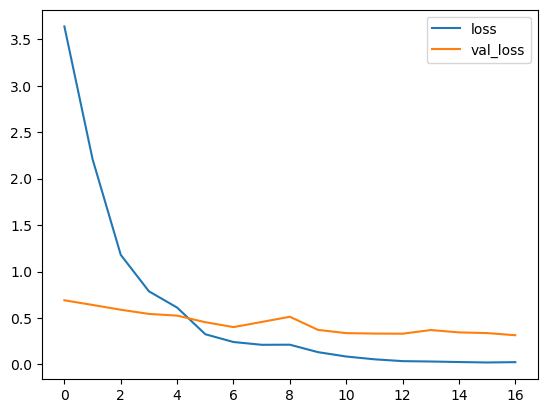

In [609]:
losses_vgg16[['loss', 'val_loss']].plot()

In [610]:
y_pred_proba_vgg16 = model_vgg16.predict_generator(val_generator_VGG16)

In [611]:
y_pred_class_vgg16= y_pred_proba_vgg16 > 0.5

In [612]:
print(classification_report(val_generator.classes, y_pred_class_vgg16))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       500
           1       0.91      0.94      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [613]:
print(confusion_matrix(val_generator.classes, y_pred_class_vgg16))

[[453  47]
 [ 31 469]]


In [614]:
accuracy = accuracy_score(val_generator.classes, y_pred_class_vgg16)
print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.922


# 12) Déploiement

À partir du modèle définitif que vous aurez construit et sauvegardé sur Keras, vous devez créer une webapp où l'utilisateur peut se connecter à l'URL, charger une image de chien ou chat et obtenir en retour la prédiction du modèle.

Stack recommandé: streamlit pour le développement de la webapp & render pour le hosting

In [617]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_vgg16)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/c3/jy5p8dhd4glb3xxx9y1bdbb80000gn/T/tmpo2siioh0/assets


INFO:tensorflow:Assets written to: /var/folders/c3/jy5p8dhd4glb3xxx9y1bdbb80000gn/T/tmpo2siioh0/assets
2023-11-30 23:00:09.842746: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-11-30 23:00:09.842762: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-11-30 23:00:09.842883: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/c3/jy5p8dhd4glb3xxx9y1bdbb80000gn/T/tmpo2siioh0
2023-11-30 23:00:09.844526: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-11-30 23:00:09.844533: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/c3/jy5p8dhd4glb3xxx9y1bdbb80000gn/T/tmpo2siioh0
2023-11-30 23:00:09.848022: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-11-30 23:00:10.007361: I tensorflow/cc/saved_model/loader.cc:217] Running initialization

In [619]:
tflite_model_path = './saved_final_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

# Fin du projet!

Au final, vous devez remettre à l'équipe pédagogique: 

### 1 - Ce notebook rempli avec les outputs visibles
### 2 - Le lien URL de votre application web